In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] ='nanumGothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
sent_opp_score = pd.read_csv("KB_감성_기회점수_Scaled.csv")

In [19]:
sent_opp_score

,Unnamed: 0,action,sent score,imp score,opp score,scaled_imp_score,scaled_sent_score,scaled_opp_score
0,0,Cluster1_actor1_action1,6.3717,5.4845,5.4845,5.749890,8.883671,5.7499
1,1,Cluster1_actor1_action2,5.4528,5.7569,6.0610,7.335887,3.730036,10.9417
2,2,Cluster1_actor1_action3,5.3733,5.1684,5.1684,3.722805,3.221879,4.2237
3,3,Cluster1_actor1_action4,5.1829,5.5315,5.8801,6.046445,2.173590,9.9193
4,4,Cluster1_actor1_action5,5.4795,5.2904,5.2904,4.491373,3.907897,5.0748
...,...,...,...,...,...,...,...,...
57,57,Cluster6_actor2_action2,7.4258,9.0226,10.6194,9.999276,9.936269,10.0623
58,58,Cluster6_actor2_action3,5.7356,3.6447,3.6447,0.110123,5.692588,0.1101
59,59,Cluster6_actor2_action4,5.5389,5.7044,5.8699,7.059799,4.313507,9.8061
60,60,Cluster6_actor2_action5,5.6751,4.1857,4.1857,0.436785,5.269916,0.4368


In [24]:
insight1_action = ['Cluster5_actor2_action2', 'Cluster5_actor2_action3', 'Cluster5_actor2_action5', 'Cluster2_actor1_action6', 'Cluster2_actor2_action2', 'Cluster1_actor1_action6', 'Cluster5_actor2_action4', 'Cluster3_actor2_action2', 'Cluster1_actor2_action3']
insight1_nametag = ["Cluster5\n셀프 세무사\nAction2", "Cluster5\n셀프 세무사\nAction3", "Cluster5\n셀프 세무사\nAction5", "Cluster2\n카드헌터\nAction6", "Cluster2\n서류 수집가\nAction2", "Cluster1\n카드헌터\nAction6", "Cluster5\n셀프 세무사\nAction4", "Cluster3\n장끼로세금을디자인하라\nAction2", "Cluster1\n퇴근후 대표님\nAction3"]

df = pd.DataFrame([insight1_action, insight1_nametag]).transpose()
df.columns = ["action", "name_tag"]

df_merged = pd.merge(df, sent_opp_score, how='inner', on='action').drop(['Unnamed: 0', 'sent score', 'imp score', 'opp score'], axis=1)

mean = df_merged.scaled_opp_score.mean()

In [25]:
df_merged

,action,name_tag,scaled_imp_score,scaled_sent_score,scaled_opp_score
0,Cluster5_actor2_action2,Cluster5\n셀프 세무사\nAction2,8.345077,5.183307,11.5068
1,Cluster5_actor2_action3,Cluster5\n셀프 세무사\nAction3,6.583040,1.343741,11.8223
2,Cluster5_actor2_action5,Cluster5\n셀프 세무사\nAction5,4.007274,0.006812,8.0077
3,Cluster2_actor1_action6,Cluster2\n카드헌터\nAction6,4.693489,2.458087,6.9289
4,Cluster2_actor2_action2,Cluster2\n서류 수집가\nAction2,6.795039,7.976497,6.7950
5,Cluster1_actor1_action6,Cluster1\n카드헌터\nAction6,4.283256,4.880002,4.2833
6,Cluster5_actor2_action4,Cluster5\n셀프 세무사\nAction4,4.229043,2.356471,6.1016
7,Cluster3_actor2_action2,Cluster3\n장끼로세금을디자인하라\nAction2,3.585487,0.079988,7.0910
8,Cluster1_actor2_action3,Cluster1\n퇴근후 대표님\nAction3,9.535253,3.220647,15.8499


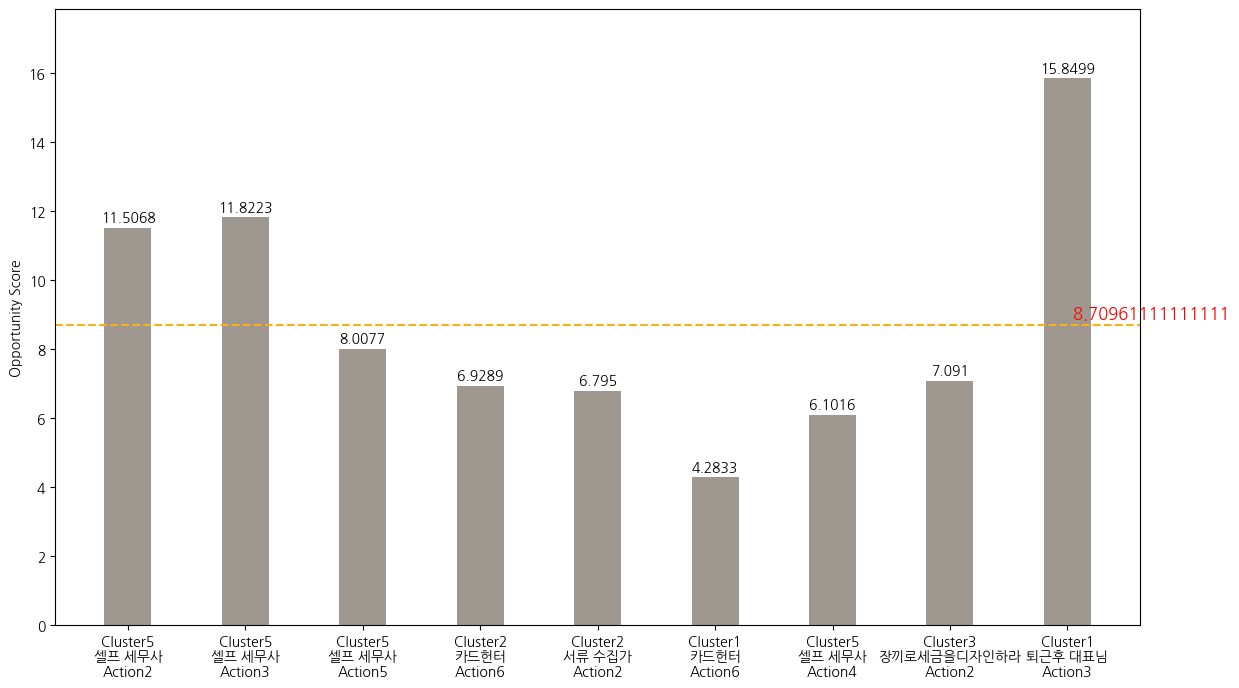

In [28]:
plt.figure(figsize=(14, 8))
plt.bar(df_merged.name_tag, df_merged.scaled_opp_score, alpha=0.7, width=0.4, color='#766C61', label='Opportunity Score')
plt.ylabel('Opportunity Score')
plt.ylim(0, df_merged['scaled_opp_score'].max()+2)

plt.axhline(y=mean, color='#FCAF15', linestyle='--', label='Average Score')
plt.text(len(df_merged)-0.95, mean+0.1, mean, va='bottom', fontsize=12, color='red')
for i in range(len(df_merged)):
    plt.text(i, df_merged.scaled_opp_score[i]+0.1, df_merged.scaled_opp_score[i], ha='center', va='bottom')

# plt.legend()